<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 1 / NOTE 2*

---

# 📝 Assignment

# **🌱 기본 과제**

## **Part 1. EDA**

### **1-1. 데이터 불러오기**

아래의 Tip을 활용하여 Seaborn 라이브러리에 내장되어 있는 Titanic 데이터셋을 불러옵니다.

> **💡 Tip**
> - import seaborn as sns
> - df = sns.[load_dataset](https://seaborn.pydata.org/generated/seaborn.load_dataset.html)("titanic")

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns 

In [ ]:
# 데이터셋 불러오기 
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### **1-2. 데이터 분석**

##### **Q1. 생존자와 사망자 중 평균 나이가 더 높은 그룹을 쓰세요.**

- `Survived` column의 1은 생존자, 0은 사망자를 의미합니다.
- **`.groupby()`**를 사용하여 생존 여부별 평균 나이를 구하세요.

In [ ]:
df.groupby('survived')['age'].mean()

survived
0    30.626179
1    28.343690
Name: age, dtype: float64

##### **Q2. 사망자 중 남자의 좌석 등급의 중앙값을 쓰세요**

- **`.groupby()`**와 [`.median()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html)을 사용하여 생존 여부와 성별에 따른 좌석 등급의 중앙값을 구하세요. 
  - 결과는 데이터프레임 형태로 나타내세요. 

In [ ]:
df.groupby(['survived', 'sex'])[['pclass']].median()

pclass
survived sex           
0        female     3.0
         male       3.0
1        female     2.0
         male       2.0

##### **Q3. `young` 그룹의 사망자의 비율을 반올림하여 소숫점 둘째 자리까지 쓰세요.**

- **`.query()`**를 사용하여 `age` 컬럼의 데이터를 다음 세 그룹으로 나누어 차례대로 변수 `young`, `middle`, `old`에 저장합니다.
  - `young`: 20세 미만 
  - `middle`: 20세 이상 60세 미만
  - `old`: 60세 이상 

- **`.value_counts()`**의 `normalize` 파라미터를 설정하여 각 그룹별 `survived` 데이터 비율을 구하세요. 

In [ ]:
young = df.query("age < 20.0")
middle = df.query("(age >= 20.0) and (age < 60.0)")
old = df.query("age >= 60.0")

In [ ]:
df.groupby('age')['survived'].count()

age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: survived, Length: 88, dtype: int64

In [ ]:
young['survived'].value_counts(normalize=True)

0    0.518293
1    0.481707
Name: survived, dtype: float64

In [ ]:
middle['survived'].value_counts(normalize=True)

0    0.610687
1    0.389313
Name: survived, dtype: float64

In [ ]:
old['survived'].value_counts(normalize=True)

0    0.730769
1    0.269231
Name: survived, dtype: float64

### **1-3. 데이터 시각화**

##### **Q4. bar 높이가 가장 높은 대상을 쓰세요.**

- 생존 여부와 성별에 따른 평균 요금을 bar plot으로 나타냅니다. 

In [ ]:
import matplotlib.pyplot as plt

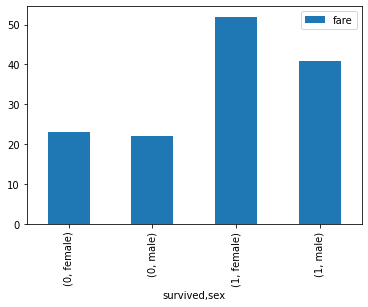

In [ ]:
df.groupby(['survived', 'sex'])[['fare']].mean().plot(kind='bar');

# **🥇 도전과제**



## **Part 2. 시각화**

### **2-1. Categorical Variable의 시각화**

##### **`survived`의 비율을 확인하세요.**

- Matplotlib의 [`.pie`](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html)를 사용하여 `survived` 컬럼의 비율을 시각해 봅니다.


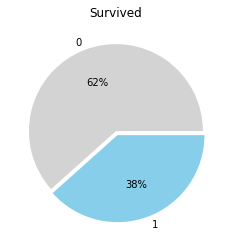

In [ ]:
# Pie plot을 통해 Survived의 distribution 확인 

ratio = df['survived'].value_counts(normalize=True) 

plt.pie(ratio, labels=[0,1], autopct='%.0f%%', explode=[0, 0.05], colors=['lightgrey', 'skyblue'])
plt.title('Survived');

In [ ]:
# 위와 동일한 그래프를 반환하는 코드
# df['Survived'].value_counts().plot.pie(autopct='%.0f%%', explode=[0, 0.05], colors=['lightgrey', 'skyblue'])

# 자동으로 비율을 나타내 주며 column명이 출력되기 때문에 title을 따로 설정하지 않았음

##### **pclass의 도수를 확인하세요.**

- Seaborn의 [`.countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html)을 사용하여 `pclass` 컬럼의 도수를 시각해 봅니다. 

In [ ]:
# Pclass의 Unique value 개수 확인 
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

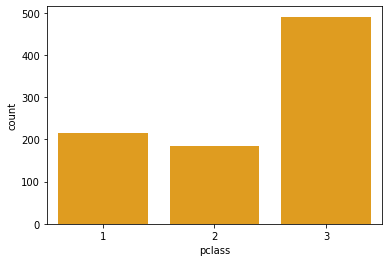

In [ ]:
# Bar plot을 통해 Pclass의 distribution 확인 
sns.countplot(data=df, x='pclass', color='orange')
plt.show();

### **2-2. Continuous variables의 시각화**

##### **Age column을 histogram으로 나타내세요.**

- Age column을 histogram으로 나타낼 때, np.arange(0, df.Age.max()+bin_size, bin_size) 에서 bin의 개수가 8이 되도록 bin_size 값을 설정하여 시각화해 보세요.

In [ ]:
# age의 통계치 확인 
df['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

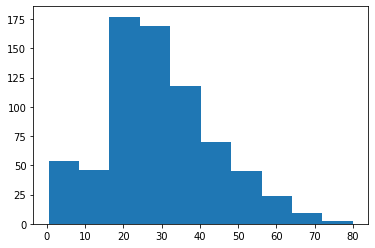

In [ ]:
# Histogram을 통해 age의 distribution 확인 
plt.hist(data=df, x='age')
plt.show();

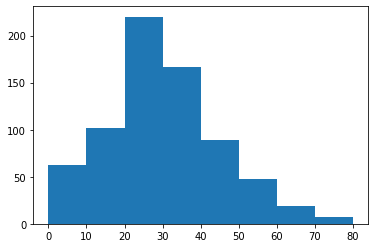

In [ ]:
# 나이대별 분포를 보기 위해 bin size 설정 
bin_size = 10
bins = np.arange(0, df.age.max()+bin_size, bin_size)

plt.hist(data=df, x='age', bins=bins)
plt.show();